In [71]:
from google.colab import files
import pandas as pd
import io

# Upload file dari komputer
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Load the file into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))  # Assuming it's a CSV

from google.colab import data_table

# Menampilkan dataset dalam tabel interaktif
data_table.DataTable(df)

Saving produk_elektronik.csv to produk_elektronik (4).csv


,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea
...,...,...,...,...,...,...,...
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany


# **NO 1**

In [8]:
from google.colab import data_table

# Menampilkan dataset dalam tabel interaktif
data_table.DataTable(df)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea
...,...,...,...,...,...,...,...
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany


In [69]:
df.describe() # Replace 'data' with 'df' which is your DataFrame variable.

,produk_id,harga,rating,jumlah_ulasan
count,512.000000,512.000000,512.000000,512.000000
mean,273.974609,575.580078,4.005388,266.724609
std,158.412691,625.641527,0.544276,147.814663
min,1.000000,32.000000,3.000000,12.000000
25%,135.750000,381.250000,3.600000,139.000000
50%,274.500000,520.500000,4.005388,267.000000
75%,410.250000,659.000000,4.400000,402.500000
max,550.000000,8341.000000,5.000000,499.000000


In [9]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


In [10]:
df.describe() # Replace 'data' with 'df' which is your DataFrame variable.

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


In [12]:
df.info() # Replace 'data' with 'df' to use your defined DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


In [14]:
df.isnull() # Changed 'data' to 'df' to match the dataframe variable likely intended.

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


Berdasarkan hasil di atas, dapat disimpulkan bahwa dataset tersebut terdiri dari 7 kolom dengan jumlah baris maksimal per kolom sebanyak 550. Namun, beberapa kolom memiliki jumlah baris kurang dari 550, sehingga diperlukan proses identifikasi lebih lanjut.

# **NO 2**

In [18]:
import numpy as np # Import numpy library

np.sum(df.isnull()) # Replace 'data' with 'df' and correct 'insull' to 'isnull'

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


a. Jumlah missing value di setiap kolom harga:30, rating: 50, jumlah_ulasan: 20

b. Missing values dapat mengurangi akurasi model, menyebabkan bias dalam analisis, serta menyulitkan proses perhitungan statistik dan pengolahan data. Selain itu, data yang hilang bisa membuat sampel kurang representatif terhadap kondisi sebenarnya, sehingga hasil analisis menjadi kurang reliabel. Missing values juga dapat menunjukkan pola tertentu dalam data yang perlu diperhatikan. Untuk mengatasinya, kita dapat menghapus data yang hilang atau mengisinya menggunakan nilai mean, median, atau modus.

c. Menentukan metode yang paling sesuai untuk menangani missing values di setiap kolom


KOLOM HARGA

In [20]:
#Melihat data pada kolom harga
df['harga'].unique() # Changed 'data' to 'df' to match previous usage.

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,        nan,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  5.160e+02,  4.480e+02,  7.360e+02,  2.280e+02,
        1.830e+02,  5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,
        5.910e+02,  5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,
        4.290e+02,  2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,
        3.850e+02,  2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,
        6.070e+02,  6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,
        3.300e+02,  4.900e+02, -1.200e+01,  1.200e+02,  6.190e

Berdasarkan hasil di atas, ditemukan adanya angka ekstrem serta nilai negatif. Oleh karena itu, metode yang paling sesuai untuk menggantikan nilai NaN adalah dengan menggunakan median.

In [35]:
#menghapus data yang negatif
df = df[df['harga']>0]

#mengganti missing value pada kolom harga
df['harga'] = df['harga'].fillna(df['harga'].median())

In [37]:
#melihat ulang jumlah missing value dalam kolom harga
np.sum(df['harga'].isnull()) # Changed 'data' to 'df' and removed extra parentheses

0

Berdasarkan output di atas, diketahui bahwa missing value sudah tidak ada di kolom

In [ ]:
KOLOM RATING

In [39]:
#melihat data pada kolom rating
df['rating'].unique() # Changed 'data' to 'df' to match previous usage.

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, nan,
       3.1, 4.9, 4.6, 5. , 4.8, 3.4, 4.1, 4.3, 3.3])

Berdasarkan kasus pada kolom rating, Kemungkinan hasil yang diperoleh berbentuk desimal, dengan angka yang tidak terlalu ekstrem serta rentang antara rating terendah dan tertinggi yang relatif kecil. Oleh karena itu, metode yang paling tepat untuk mengisi missing value pada kolom rating adalah metode mean.

In [41]:
#mengganti missing value pada kolom rating
df['rating']=df['rating'].fillna(df['rating'].mean()) # Changed 'data' to 'df' to match previous usage.

In [43]:
#melihat ulang jumlah missing value pada kolom rating
np.sum(df['rating'].isnull()) # Changed 'data' to 'df' to match previous usage and variable definition

0

Berdasarkan output di atas, diketahui sudah tidak ada missingvalue pada kolom rating

KOLOM JUMLAH_ULASAN

In [45]:
#melihat data pada kolom jumlah_ulasan
df['jumlah_ulasan'].unique() # Changed 'data' to 'df' to match previous usage and variable definition

array([273., 239., 209.,  59.,  76., 309., 390.,  67., 268.,  nan, 335.,
       139., 224., 181., 267., 111., 218., 300., 363., 480., 295., 125.,
       159., 451.,  45., 462., 342., 486., 312., 320., 217., 115., 455.,
       130.,  64., 409.,  21., 405., 145., 477.,  12., 153.,  39., 246.,
       288., 357., 113., 127.,  14., 257., 373., 158.,  93., 463., 475.,
       465., 240., 297., 170., 281., 469.,  47., 235., 151., 301., 160.,
       123.,  75., 370., 350., 484., 258., 466., 458., 340., 332., 189.,
       199., 416., 163., 205., 271., 428., 415., 436., 152., 351., 110.,
       253., 499., 248.,  58.,  51., 175.,  91., 438., 167., 225., 471.,
       143., 345.,  16., 445.,  23.,  82., 408., 172., 356., 215., 265.,
       275., 290., 262., 319., 298., 173., 104., 330., 119., 247., 396.,
       492., 434., 399.,  34., 150., 126., 491., 401., 414., 461.,  88.,
        77., 182., 453., 137., 105., 101.,  40., 343.,  29., 155., 325.,
       456., 169., 358.,  52., 263.,  69., 296., 47

Guna menghindari angka desimal, metode yang cocok digunakan untuk mengisi missing value pada kolom yaitu dengan metode modus

In [47]:
from scipy.stats import mode
df['jumlah_ulasan'].mode() # Changed 'data' to 'df' to match previous usage and variable definition

,jumlah_ulasan
0,492.0


In [49]:
#mengganti missing value pada kolom jumlah_ulasan
df['jumlah_ulasan']=df['jumlah_ulasan'].fillna(df['jumlah_ulasan'].mode()[0]) # Changed 'data' to 'df' and access the mode value

In [51]:
#melihat ulang jumlah missing value pada jumlah_missing
np.sum(df['jumlah_ulasan'].isnull()) # Changed 'data' to 'df' to match previous usage and variable definition

0

Berdasarkan hasil di atas, diketahui sudah tidak ada missing value pada kolom jumlah_ulasan

In [53]:
#mengecek ulang informasi data
df.info() # Changed 'data' to 'df' to match previous usage and variable definition

<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      512 non-null    int64  
 1   nama_produk    512 non-null    object 
 2   kategori       512 non-null    object 
 3   harga          512 non-null    float64
 4   rating         512 non-null    float64
 5   jumlah_ulasan  512 non-null    float64
 6   negara_asal    512 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 32.0+ KB


## **NO 3**

a. Identifikasi outlier dalam dataset

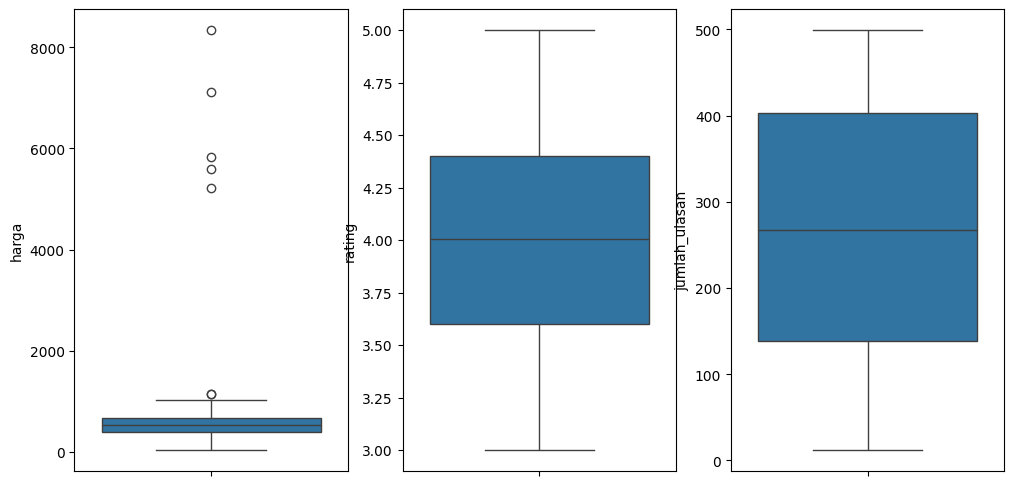

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

#kolom menarik yang ingin dicek outliyernya
num_cols=['harga','rating','jumlah_ulasan'] #removed'negara_asal' as it's not numerical

#visualisasi boxplot
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols,1):
  plt.subplot(1,3,i)
  sns.boxplot(df[col])
  plt.ylabel(col)
plt.show()

In [61]:
def detect_outliers_iqr(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1 #rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers #add this line to return the outliers

#mengecek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
  outliers= detect_outliers_iqr(df, col) # Change 'data' to 'df'
  print(f"{col}:{len(outliers)} outliers")

harga:7 outliers
rating:0 outliers
jumlah_ulasan:0 outliers


Beradasarkan output di atas, terlihat bahwa kolom harga, rating, dan jumlah_ulasan sudah seimbang, sehingga tidak pelru penanganan terhadap outlier

b. Dampak dari keberadaan outlier terhadap analisis terhadap analisis adalah Kehadiran outlier dapat menyebabkan bias dalam analisis, memengaruhi performa model statistik dan machine learning, serta meningkatkan variabilitas data yang berdampak pada membesarnya standar deviasi. Selain itu, outlier dapat mengakibatkan kesalahan dalam pengujian statistik dan mengganggu visualisasi data, sehingga pola distribusi menjadi sulit diinterpretasikan. Oleh karena itu, penting untuk mengidentifikasi dan menganalisis outlier sebelum memutuskan apakah perlu dihapus, ditransformasi, atau dipertahankan sesuai dengan tujuan analisis.

# **NO 4**

In [63]:
df['negara_asal'].unique() # Changed 'data' to 'df' to match previous usage and variable definition


array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

Berdasarkan data tersebut, kolom yang membutuhkan encoding adalah kolom negara_asal. Metode yang digunakan adalah One_Hot Encoding, di mana negara dalam kolom tersebut dikelompokkan berdasarkan benua.

In [65]:
# Buat dictionary untuk mapping negara ke region
country_to_region = {
    'Japan': 'Asia', 'Canada': 'America', 'South Korea': 'Asia', 'Frace': 'Europe', 'USA': 'America', 'Germany': 'Europr', 'China': 'Asia', 'India': 'Asia', 'UK': 'Europe',

}

# Assuming your column is named 'negara_asal', change 'country' to 'negara_asal'
# Change 'data' to 'df' to match the DataFrame used previously
df['country_region'] = df['negara_asal'].map(country_to_region).fillna('Others')

# One-Hot Encoding pada region
# Change 'data' to 'df' to match the DataFrame used previously
df = pd.get_dummies(df, columns=['country_region'], prefix='region')

In [67]:
#Cek ulang datanya
df.info() # Changed 'data' to 'df' to match previous usage and variable definition

<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 0 to 549
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   produk_id       512 non-null    int64  
 1   nama_produk     512 non-null    object 
 2   kategori        512 non-null    object 
 3   harga           512 non-null    float64
 4   rating          512 non-null    float64
 5   jumlah_ulasan   512 non-null    float64
 6   negara_asal     512 non-null    object 
 7   region_America  512 non-null    bool   
 8   region_Asia     512 non-null    bool   
 9   region_Europe   512 non-null    bool   
 10  region_Europr   512 non-null    bool   
 11  region_Others   512 non-null    bool   
dtypes: bool(5), float64(3), int64(1), object(3)
memory usage: 34.5+ KB


Label Encoding mengonversi data kategori menjadi angka berdasarkan urutan tertentu, sehingga lebih cocok untuk data yang memiliki hierarki, seperti jenjang pendidikan (SMA < S1 < S2 < S3).  

One-Hot Encoding mengubah kategori menjadi representasi biner dan lebih sesuai untuk data nominal tanpa urutan, seperti jenis kelamin atau negara asal.  

Target Encoding menggantikan kategori dengan rata-rata nilai dari variabel target dan dapat diterapkan pada data seperti kode wilayah jika memiliki hubungan dengan variabel target. Namun, metode ini berisiko menyebabkan kebocoran data (data leakage).  

Frequency Encoding mengganti kategori dengan jumlah kemunculannya dalam dataset dan ideal digunakan untuk variabel dengan banyak kategori unik, seperti kode pos.  

Memilih metode encoding yang tepat sangat penting agar model dapat memahami pola dalam data secara optimal tanpa kehilangan informasi penting.